In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, floor, ceil, sqrt
import random

CC = 2.9979 * 10 ** 10  # cm/s
CM = 511 * 10 ** 3 / (CC ** 2)
PLANCK = 6.58212 * 10 ** -16 # eV*s
LAMBDA = 1.03 * 10 ** -4  # cm

Ep1 = PLANCK * 2 * pi * CC / LAMBDA
print(f'{Ep1=}')
E_p = Ep1
mc2 = CM * CC * CC
# r_e = 1.0 # радиус электрона
r_e = 2.8179403262 * 10 ** -15

# P_t = 1.
# tau = 0

theta_LCS = pi

Ep1=1.2037202912132337


### Functions

In [30]:
# def collimate(max_theta):
#     def _reject(func):
#         def wrapper(*args, **kwargs):
#             E_g = args[0]
#             if np.arccos(mc2/E_p - mc2/E_g + 1) > max_theta:
#                 return 0
#             return func(*args, **kwargs)
#         return wrapper
#     return _reject

def f(E_g):
    return ( (mc2/E_p-mc2/E_g) ** 2 + 2.0 * (mc2/E_p-mc2/E_g) + E_p/E_g + E_g/E_p ) / (2.0 + 2.0 * E_p/mc2)

def dsigma_dEg(E_g):
    print(f'{r_e=}\n{mc2=}\n{E_p=}\n{f(E_g)=}')
    return pi * r_e ** 2 * mc2 / E_p ** 2 * (2.0 + 2 * E_p / mc2) * f(E_g)

# def dsigma_dEg_dphi(E_g, phi):
#     return (mc2 * r_e ** 2 / (2 * E_p ** 2) 
#             * ((1 + P_t * np.cos(2*tau - 2*phi)) * ((mc2/E_p-mc2/E_g) ** 2 + 2.0 * (mc2/E_p-mc2/E_g)) + E_p/E_g + E_g/E_p ))

def lorentz2(e_1, E_p, gamma):
    sz2 = mc2/E_p - mc2/e_1 + 1
    betaCM = sqrt(1. - 1./gamma/gamma)
    return e_1 * gamma * (1. + betaCM * sz2)

### Распределения по энергиям E_g (old)

In [31]:
# plt.figure(num=0, dpi=100)
# gammaCM = 88
# betaCM = sqrt(1. - 1./gammaCM/gammaCM)
# sz2 = np.cos(theta_LCS)

# E_p = lorentz_transform(E_p, gammaCM)
# # E_g = lorentz_transform(E_g, 2)
# xlist = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
# # xlist = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
# # xlist = np.linspace(lorentz_transform(E_p/(1.0 + 2.0*E_p/mc2), gammaCM), lorentz_transform(E_p, gammaCM), 100)

# # xlist = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)

# ylist = dsigma_dEg(xlist)
# # ylist = dsigma_dEg_dphi(xlist, pi/6)
# # plt.plot(xlist, ylist, label='dsigma_dEg_dphi(E_g)')
# plt.plot(xlist, ylist, label='dsigma_dEg(E_g)')
# plt.xlabel('E_g')
# plt.ylabel('f')
# plt.legend()
# # plt.title('y=x^2')

# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# plt.locator_params(axis='both', nbins=6)
# ax = plt.gca()

# # x_formatter = ScalarFormatter(useOffset=False)
# x_formatter = FormatStrFormatter('%.6f')
# ax.xaxis.set_major_formatter(x_formatter)

### Распределения по энергиям E_g

r_e=2.8179403262000004e-15
mc2=511000.0000000001
E_p=239.98333217576516
f(E_g)=array([0.99953103, 0.97952405, 0.95992613, 0.94073725, 0.92195737,
       0.90358648, 0.88562456, 0.86807158, 0.85092751, 0.83419234,
       0.81786604, 0.80194859, 0.78643996, 0.77134013, 0.75664908,
       0.74236679, 0.72849323, 0.71502837, 0.7019722 , 0.68932469,
       0.67708582, 0.66525556, 0.6538339 , 0.64282081, 0.63221626,
       0.62202023, 0.6122327 , 0.60285365, 0.59388304, 0.58532087,
       0.57716711, 0.56942172, 0.5620847 , 0.55515601, 0.54863564,
       0.54252355, 0.53681973, 0.53152416, 0.5266368 , 0.52215764,
       0.51808666, 0.51442382, 0.51116911, 0.50832251, 0.50588399,
       0.50385352, 0.50223109, 0.50101667, 0.50021024, 0.49981177,
       0.49982124, 0.50023863, 0.50106392, 0.50229708, 0.50393808,
       0.50598692, 0.50844355, 0.51130796, 0.51458013, 0.51826003,
       0.52234764, 0.52684294, 0.5317459 , 0.5370565 , 0.54277472,
       0.54890052, 0.5554339 , 0.56237483, 0.56972

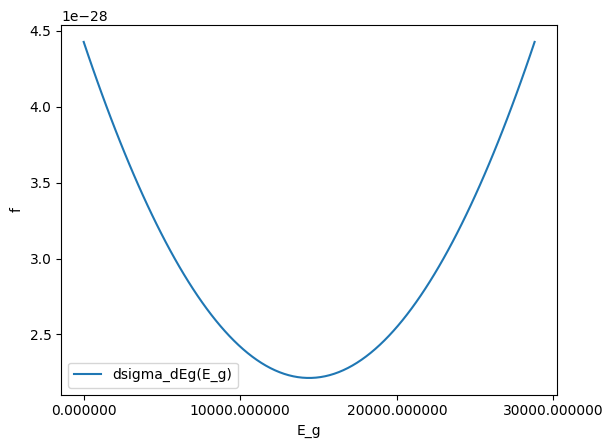

In [32]:
# без отклонения/лобовое
gammaCM = 60
betaCM = sqrt(1. - 1./gammaCM/gammaCM)


Ep2 = Ep1 * gammaCM * (1. + betaCM)
E_p = Ep2

# Ep1 = PLANCK * 2 * pi * CC / LAMBDA
Ep1 = 2.
Ep2 = Ep1 * gammaCM * (1. + betaCM)
E_p = Ep2

plt.figure(num=0, dpi=100)

xlist1 = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
xlist2 = lorentz2(xlist1, E_p=Ep2, gamma=gammaCM)

ylist = dsigma_dEg(xlist1)
print(pi)
print(xlist2)
plt.plot(xlist2, ylist, label='dsigma_dEg(E_g)')
plt.xlabel('E_g')
plt.ylabel('f')
plt.legend()

from matplotlib.ticker import FormatStrFormatter
plt.locator_params(axis='both', nbins=6)
ax = plt.gca()

x_formatter = FormatStrFormatter('%.6f')
ax.xaxis.set_major_formatter(x_formatter)

### Распределения по углу ϕ

In [33]:
# E_g = 0.002
# xlist = list(np.linspace(0, pi, 100))
# # np.ndarray()

# plt.figure(num=0, dpi=100)
# ylist = np.vectorize(dsigma_dEg_dphi)(E_g, xlist)
# plt.plot(xlist, ylist, label='dsigma_dEg_dphi(E_g)')

# plt.xlabel('ϕ')
# # plt.ylabel('f')
# plt.legend()
# # plt.title('y=x^2')

# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# plt.locator_params(axis='both', nbins=5)
# ax = plt.gca()

# # x_formatter = ScalarFormatter(useOffset=False)
# x_formatter = FormatStrFormatter('%.6f')
# ax.xaxis.set_major_formatter(x_formatter)

In [34]:
    # a = 1./(2.*E_p/mc2*E_p)
    # b = (1./E_p/mc2 - 1./E_g/mc2)*(1./E_p/mc2 - 1./E_g/mc2) + 2.*(1./E_p/mc2 - 1./E_g/mc2)
    # c = E_p/E_g + E_g/E_p
    # sigma_max = a*((1. - P_t)*b + c)
    # phi1 = random.uniform(0.0, 2*pi)
    # reject = True    
    # while reject:
    #     phi1 = random.uniform(0.0, 2*pi) 
    #     sigma1 = a*((1. + P_t*np.cos(2.*(tau-phi1)))*b + c)
    #     r = random.uniform(0.0, sigma_max)
    #     if r <= sigma1:
    #         reject = False

# xlist = []

# for _ in range(100):
#     reject = True
#     while (reject):
#         E_g = random.uniform(E_p/(1.0 + 2.0*E_p/mc2), E_p)
#         # Eg_mc2 = Eg/mc2

#         f_Eg = f(E_g)
                    
#         r = random.uniform(0, 1)
#         if r <= f_Eg:
#             reject = False
#         xlist.append(E_g)
# xlist.sort()

# ylist = f(xlist)
# plt.plot(xlist, ylist, label='f(E_g)')

# ylist = dsigma_dEg(xlist)
# plt.plot(xlist, ylist, label='dsigma_dEg(E_g)')

NameError: name 'dsigma_dEg_dphi' is not defined

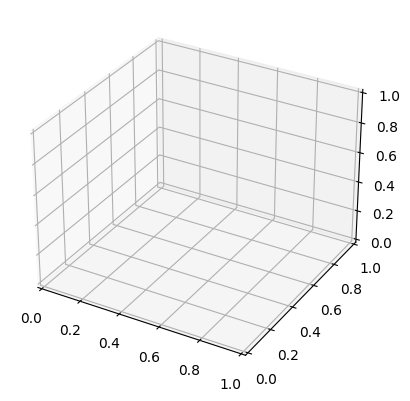

In [35]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
Y = np.linspace(-pi, pi, 100)
X, Y = np.meshgrid(X, Y)

Z = dsigma_dEg_dphi(X, Y)

# Plot the surface.
surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.yaxis.set_major_formatter('{x:.06f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()